# In Class Notebook, Week 02

To access this in near-real time try: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/blob/master/week02/inClass_week02.ipynb

Or paste this URL into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

Hey I'm writing a thing!

In [2]:
import matplotlib.pyplot as plt # shorthand so I don't have to type as much
import numpy as np

In [3]:
from PIL import Image

In [4]:
# my directory structure on a mac
im = Image.open('/Users/jnaiman/Downloads/stitch_reworked.png')

# windows it will be like: C://jnaiman/Downloads ?

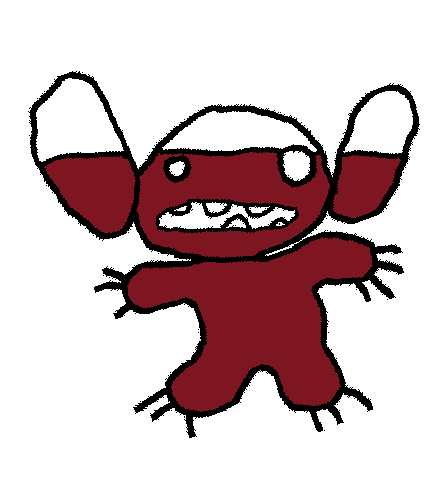

In [5]:
im

In [6]:
type(im)

PIL.PngImagePlugin.PngImageFile

In [7]:
im_data = np.array(im)

In [10]:
im_data.shape # 483 y-pixels, 430 x-pixels, 4 color channels (RGBA)

(483, 430, 4)

In [11]:
np.unique(im_data)

array([  0,  22,  33, 126, 255], dtype=uint8)

In [13]:
im_data.reshape(-1, im_data.shape[2]) # I've used reshape to turn my 
#                                       3D object into a list of pixels

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [14]:
im_data.reshape?

In [17]:
np.unique(im_data.reshape(-1,im_data.shape[2]),axis=0)
# this unravels along the "long" list of pixels and looks for unique 4-color combos

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

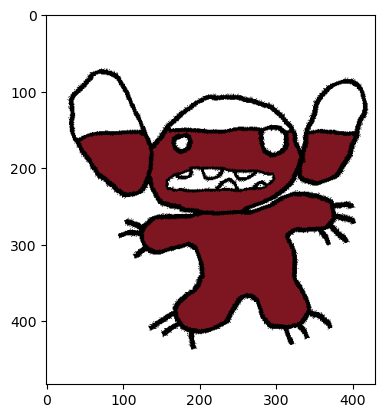

In [18]:
plt.imshow(im_data)

We have 4 colors, but one is perfectly see-through (Alpha channel = 0), what pixels are those?

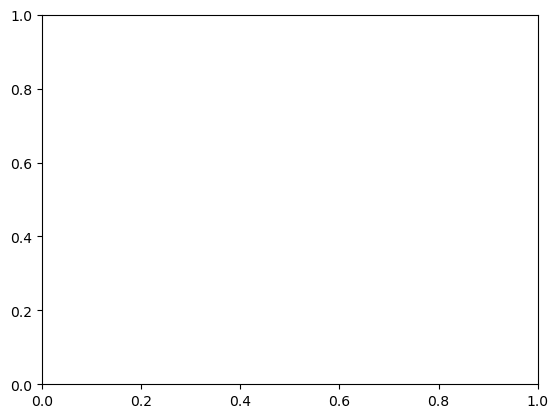

In [19]:
fig, ax = plt.subplots()